In [1]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(gridExtra)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
library(WRS2)
library(dunn.test)

In [2]:
data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  Cluster_avoid_cutoff_55 = col_integer(),
  Cluster_hierarc_method_complet = col_integer(),
  Perf_Group = col_integer(),
  Order = col_integer(),
  Last6Total = col_integer(),
  STAI_T = col_integer(),
  BIS = col_integer(),
  AllAR = col_integer(),
  STAIS_Group = col_integer(),
  BIS_Group = col_integer(),
  ID2 = col_integer(),
  STAIT_Groups = col_integer(),
  BISMedian_Group = col_integer(),
  VAR00006 = col_integer(),
  AR_Group = col_integer(),
  Age = col_integer(),
  Ancestry = col_integer(),
  Sex = col_integer(),
  Marital_Status = col_integer()
  # ... with 99 more columns
)
See spec(...) for full column specifications.


In [42]:
#colnames(data)

In [3]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable HyperAvoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'stable hypo-avoiders' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

Warning message:
“Unknown or uninitialised column: 'Avoidance_clusters'.”

In [4]:
data <- data[!(is.na(data$Avoidance_clusters)), ]
data$Avoidance_clusters <- as.factor(data$Avoidance_clusters)

# ANXIETY

Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <89>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <88>”

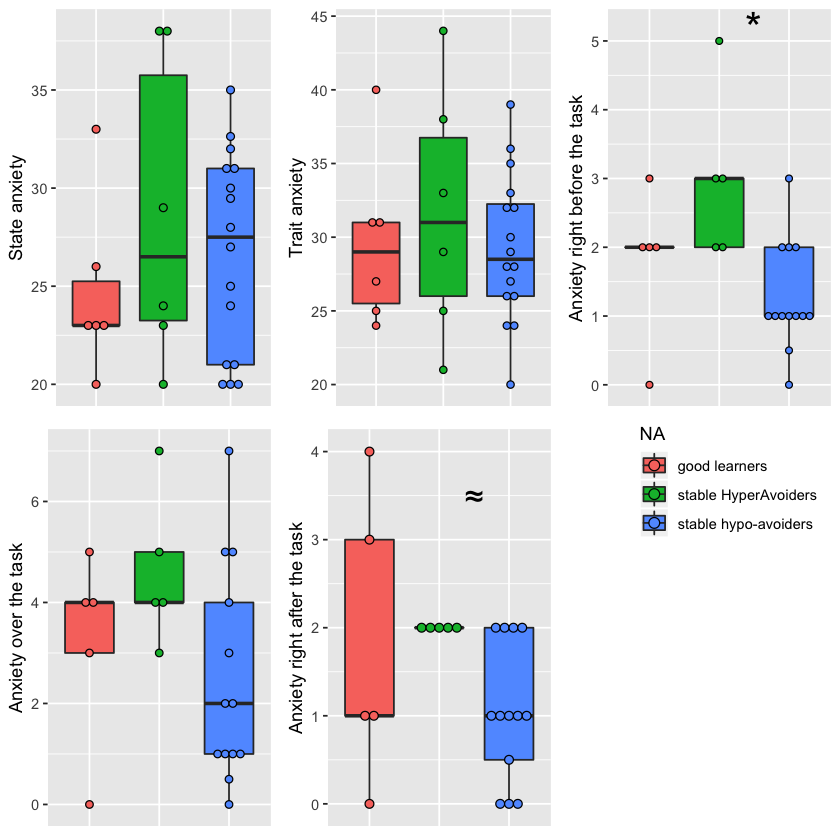

In [147]:
StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSPlot <- StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTPlot <- StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

VasPreBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Pre,
                                    fill=Avoidance_clusters))
VasPrePlot <- VasPreBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right before the task") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=2.5, y=5.2, label="*", size=9)

VasTaskPlot <- VasTaskBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety over the task") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

VasPostPlot <- VasPostBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right after the task") + 
    theme(legend.position=c(1.8,0.87)) + labs(fill=NA) +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=2.5, y=3.5, label="≈", size=7)


grid.arrange(StaiSPlot, StaiTPlot, VasPrePlot, VasTaskPlot, VasPostPlot,
                        ncol = 3, nrow = 2)

## Kruskal-Wallis rank sum tests for anxiety

In [138]:
print("STATE ANXIETY (STAI S)")
kruskal.test(data$STAI_S ~ data$Avoidance_clusters)
print("===========================================")
print("TRAIT ANXIETY (STAI T)")
kruskal.test(data$STAI_T ~ data$Avoidance_clusters)
print("===========================================")
print("VAS_Pre (anxiety right before the task)")
kruskal.test(data$VAS_Pre ~ data$Avoidance_clusters)
dunn.test(data$VAS_Pre, data$Avoidance_clusters, method='bh')
print("===========================================")
print("VAS_Task (anxiety over the task)")
kruskal.test(data$VAS_Task ~ data$Avoidance_clusters)
print("===========================================")
print("VAS_Post (anxiety right after the task)")
kruskal.test(data$VAS_Post ~ data$Avoidance_clusters)
dunn.test(data$VAS_Post, data$Avoidance_clusters, method='bh')

[1] "STATE ANXIETY (STAI S)"



	Kruskal-Wallis rank sum test

data:  data$STAI_S by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.91701, df = 2, p-value = 0.6322


[1] "==========================================="
[1] "TRAIT ANXIETY (STAI T)"



	Kruskal-Wallis rank sum test

data:  data$STAI_T by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.35114, df = 2, p-value = 0.839


[1] "==========================================="
[1] "VAS_Pre (anxiety right before the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Pre by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.9371, df = 2, p-value = 0.0189


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 7.9371, df = 2, p-value = 0.02


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -1.332877
         |     0.1369
         |
stable h |   1.182955   2.784874
         |     0.1184    0.0080*

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "==========================================="
[1] "VAS_Task (anxiety over the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Task by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 3.4425, df = 2, p-value = 0.1788


[1] "==========================================="
[1] "VAS_Post (anxiety right after the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Post by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.8502, df = 2, p-value = 0.08847


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.8502, df = 2, p-value = 0.09


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -0.954087
         |     0.1700
         |
stable h |   1.013231   2.159901
         |     0.2332     0.0462

alpha = 0.05
Reject Ho if p <= alpha/2


# COPING STYLES

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bo

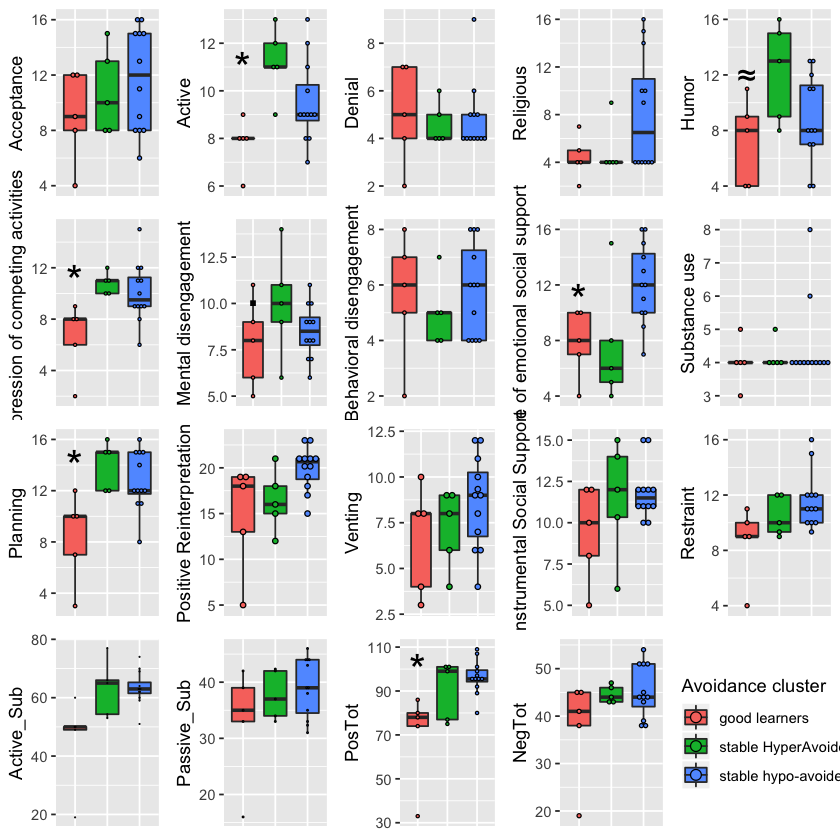

In [10]:
AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptPlot <- AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Acceptance") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActivePlot <- ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Active") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)




DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialPlot <- DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Denial") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousPlot <- ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Religious") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorPlot <- HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=12, label="≈", size=7)




SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressPlot <- SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Suppression of competing activities") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)




MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisPlot <- MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Mental disengagement") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label=".", size=12)




BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisPlot <- BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center") +
    labs(x="Avoidance cluster", y="Behavioral disengagement") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocPlot <- EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Use of emotional social support") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)



SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstPlot <- SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanPlot <- PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Planning") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=14, label="*", size=9)
















PosReinBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosRein_Sub,
                                    fill=Avoidance_clusters))
PosReinPlot <- PosReinBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.6, stackdir="center") +
    labs(x="Avoidance cluster", y="Positive Reinterpretation") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




VentBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Vent_Sub,
                                    fill=Avoidance_clusters))
VentPlot <- VentBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Venting") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


InsSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, InsSoc_Sub,
                                    fill=Avoidance_clusters))
InsSocPlot <- InsSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Instrumental Social Support") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



ResBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Res_Sub,
                                    fill=Avoidance_clusters))
ResPlot <- ResBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Restraint") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



ActiveSubBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active_Sub,
                                    fill=Avoidance_clusters))
ActiveSubPlot <- ActiveSubBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Active_Sub") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


PassiveSubBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Passive_Sub,
                                    fill=Avoidance_clusters))
PassiveSubPlot <- PassiveSubBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Passive_Sub") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())






PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotPlot <- PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=100, label="*", size=9)




NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotPlot <- NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.87, stackdir="center") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(2.05,0.5)) + labs(fill="Avoidance cluster") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

grid.arrange(AcceptPlot, ActivePlot, DenialPlot, ReligiousPlot, HumorPlot, SuppressPlot, MentalDisPlot,
             BehDisPlot, EmoSocPlot, SubstPlot, PlanPlot, PosReinPlot, VentPlot, InsSocPlot, ResPlot, 
             ActiveSubPlot, PassiveSubPlot, PosTotPlot, NegTotPlot,
                        ncol = 5, nrow = 4)

## Kruskal-Wallis rank sum tests for coping styles

In [16]:
print("Acceptance coping style")
kruskal.test(data$Accept ~ data$Avoidance_clusters)
print("======================================================================================")
print("Active coping style")
kruskal.test(data$Active ~ data$Avoidance_clusters)
dunn.test(data$Active, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Denial coping style")
kruskal.test(data$Denial ~ data$Avoidance_clusters)
print("======================================================================================")
print("Religious coping style")
kruskal.test(data$Religious ~ data$Avoidance_clusters)
print("======================================================================================")
print("Humor coping style")
kruskal.test(data$Humor ~ data$Avoidance_clusters)
dunn.test(data$Humor, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Suppression of competing activities coping style")
kruskal.test(data$Suppress ~ data$Avoidance_clusters)
dunn.test(data$Suppress, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Mental Disengagement coping style")
kruskal.test(data$MentalDis ~ data$Avoidance_clusters)
print("======================================================================================")
print("Behavior Disengagement coping style")
kruskal.test(data$BehDis ~ data$Avoidance_clusters)
print("======================================================================================")
print("Use of emotional social support coping style")
kruskal.test(data$EmoSoc ~ data$Avoidance_clusters)
dunn.test(data$EmoSoc, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Substance use coping style")
kruskal.test(data$Subst ~ data$Avoidance_clusters)
print("======================================================================================")
print("Planing coping style")
kruskal.test(data$Plan ~ data$Avoidance_clusters)
dunn.test(data$Plan, data$Avoidance_clusters, method='bh')
print("======================================================================================")

print("Positive Reinterpretation coping style")
kruskal.test(data$PosRein_Sub ~ data$Avoidance_clusters)
dunn.test(data$PosRein_Sub, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Venting coping style")
kruskal.test(data$Vent_Sub ~ data$Avoidance_clusters)
print("======================================================================================")
print("Instrumental Social Support coping style")
kruskal.test(data$InsSoc_Sub ~ data$Avoidance_clusters)
print("======================================================================================")
print("Restraint coping style")
kruskal.test(data$Res_Sub ~ data$Avoidance_clusters)
dunn.test(data$Res_Sub, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Active_Sub coping style")
kruskal.test(data$Active_Sub ~ data$Avoidance_clusters)
dunn.test(data$Active_Sub, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Passive_Sub coping style")
kruskal.test(data$Passive_Sub ~ data$Avoidance_clusters)
print("======================================================================================")


print("Positive total coping style")
kruskal.test(data$PosTot ~ data$Avoidance_clusters)
dunn.test(data$PosTot, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("Negative total coping style")
kruskal.test(data$NegTot ~ data$Avoidance_clusters)
print("======================================================================================")

[1] "Acceptance coping style"



	Kruskal-Wallis rank sum test

data:  data$Accept by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.5569, df = 2, p-value = 0.4591


[1] "======================================================================================"
[1] "Active coping style"



	Kruskal-Wallis rank sum test

data:  data$Active by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6744, df = 2, p-value = 0.01307


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 8.6744, df = 2, p-value = 0.01


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.942129
         |    0.0049*
         |
stable h |  -1.856511   1.639259
         |     0.0475     0.0506

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Denial coping style"



	Kruskal-Wallis rank sum test

data:  data$Denial by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.3096, df = 2, p-value = 0.8566


[1] "======================================================================================"
[1] "Religious coping style"



	Kruskal-Wallis rank sum test

data:  data$Religious by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.8738, df = 2, p-value = 0.2377


[1] "======================================================================================"
[1] "Humor coping style"



	Kruskal-Wallis rank sum test

data:  data$Humor by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.7249, df = 2, p-value = 0.09419


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.7249, df = 2, p-value = 0.09


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.068832
         |     0.0578
         |
stable h |  -0.692571   1.765568
         |     0.2443     0.0581

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Suppression of competing activities coping style"



	Kruskal-Wallis rank sum test

data:  data$Suppress by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.5711, df = 2, p-value = 0.01377


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 8.5711, df = 2, p-value = 0.01


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.785487
         |    0.0080*
         |
stable h |  -2.379727   0.929924
         |    0.0130*     0.1762

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Mental Disengagement coping style"



	Kruskal-Wallis rank sum test

data:  data$MentalDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.25, df = 2, p-value = 0.3247


[1] "======================================================================================"
[1] "Behavior Disengagement coping style"



	Kruskal-Wallis rank sum test

data:  data$BehDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.99869, df = 2, p-value = 0.6069


[1] "======================================================================================"
[1] "Use of emotional social support coping style"



	Kruskal-Wallis rank sum test

data:  data$EmoSoc by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.7491, df = 2, p-value = 0.02076


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 7.7491, df = 2, p-value = 0.02


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |   0.097839
         |     0.4610
         |
stable h |  -2.179708  -2.295960
         |    0.0220*    0.0325*

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Substance use coping style"



	Kruskal-Wallis rank sum test

data:  data$Subst by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.55839, df = 2, p-value = 0.7564


[1] "======================================================================================"
[1] "Planing coping style"



	Kruskal-Wallis rank sum test

data:  data$Plan by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6351, df = 2, p-value = 0.01333


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 8.6351, df = 2, p-value = 0.01


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.814964
         |    0.0073*
         |
stable h |  -2.350646   0.994029
         |    0.0141*     0.1601

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Positive Reinterpretation coping style"



	Kruskal-Wallis rank sum test

data:  data$PosRein_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 6.5707, df = 2, p-value = 0.03743


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 6.5707, df = 2, p-value = 0.04


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -0.122790
         |     0.4511
         |
stable h |  -2.132528  -1.986631
         |     0.0494     0.0352

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Venting coping style"



	Kruskal-Wallis rank sum test

data:  data$Vent_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.3999, df = 2, p-value = 0.3012


[1] "======================================================================================"
[1] "Instrumental Social Support coping style"



	Kruskal-Wallis rank sum test

data:  data$InsSoc_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.2002, df = 2, p-value = 0.3328


[1] "======================================================================================"
[1] "Restraint coping style"



	Kruskal-Wallis rank sum test

data:  data$Res_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 6.0047, df = 2, p-value = 0.04967


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 6.0047, df = 2, p-value = 0.05


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -1.187345
         |     0.1763
         |
stable h |  -2.429671  -1.018894
         |    0.0227*     0.1541

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Active_Sub coping style"



	Kruskal-Wallis rank sum test

data:  data$Active_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.9104, df = 2, p-value = 0.01162


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 8.9104, df = 2, p-value = 0.01


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.464147
         |    0.0103*
         |
stable h |  -2.819136   0.108707
         |    0.0072*     0.4567

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Passive_Sub coping style"



	Kruskal-Wallis rank sum test

data:  data$Passive_Sub by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.6583, df = 2, p-value = 0.4364


[1] "======================================================================================"
[1] "Positive total coping style"



	Kruskal-Wallis rank sum test

data:  data$PosTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.8296, df = 2, p-value = 0.01994


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 7.8296, df = 2, p-value = 0.02


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -1.904625
         |     0.0426
         |
stable h |  -2.780434  -0.517402
         |    0.0081*     0.3024

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "Negative total coping style"



	Kruskal-Wallis rank sum test

data:  data$NegTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.908, df = 2, p-value = 0.3852


[1] "======================================================================================"


# IMPULSIVITY (Barrat’s Impulsivity Scale)

'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_bindot).”

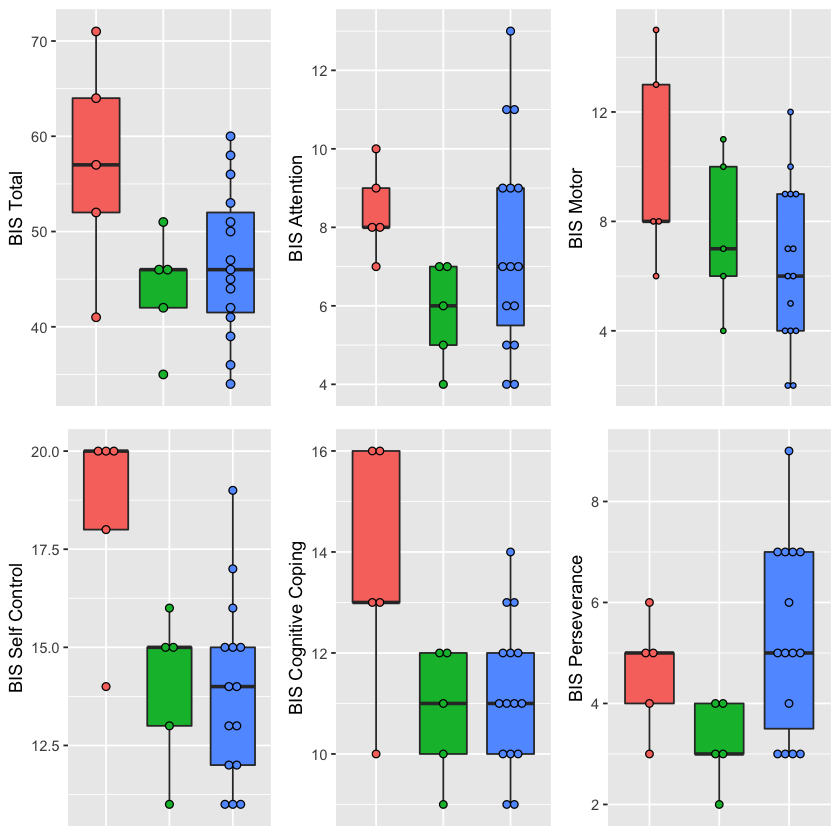

In [29]:
BisTotalBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_Total,
                                    fill=Avoidance_clusters))
BisTotalPlot <- BisTotalBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.9, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Total") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


BisAttentionBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_Attention,
                                    fill=Avoidance_clusters))
BisAttentionPlot <- BisAttentionBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.4) + 
    geom_dotplot(binaxis="y", binwidth=.2, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Attention") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


BisMotorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_Motor,
                                    fill=Avoidance_clusters))
BisMototPlot <- BisMotorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.5) + 
    geom_dotplot(binaxis="y", binwidth=1, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Motor") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


BisMotorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_Motor,
                                    fill=Avoidance_clusters))
BisMototPlot <- BisMotorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.4) + 
    geom_dotplot(binaxis="y", binwidth=.2, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Motor") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



BisSelfControlBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_SlfCtl,
                                    fill=Avoidance_clusters))
BisSelfControlPlot <- BisSelfControlBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.2, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Self Control") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



BisCogCopingBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_CogCpx,
                                    fill=Avoidance_clusters))
BisCogCopingPlot <- BisCogCopingBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Cognitive Coping") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



BisPersevBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BIS_Prsvr,
                                    fill=Avoidance_clusters))
BisPersevPlot <- BisPersevBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="BIS Perseverance") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())





grid.arrange(BisTotalPlot, BisAttentionPlot, BisMototPlot, BisSelfControlPlot, BisCogCopingPlot,
             BisPersevPlot, ncol = 3, nrow = 2)

## Kruskal-Wallis rank sum tests for impulsivity (BIS)

In [32]:
print("BIS Total")
kruskal.test(data$BIS_Total ~ data$Avoidance_clusters)
print("======================================================================================")
print("BIS Attention")
kruskal.test(data$BIS_Attention ~ data$Avoidance_clusters)
print("======================================================================================")
print("BIS Motor")
kruskal.test(data$BIS_Motor ~ data$Avoidance_clusters)
print("======================================================================================")
print("BIS Self-Conrol")
kruskal.test(data$BIS_SlfCtl ~ data$Avoidance_clusters)
dunn.test(data$BIS_SlfCtl, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("BIS Cognitive Coping")
kruskal.test(data$BIS_CogCpx ~ data$Avoidance_clusters)
dunn.test(data$BIS_CogCpx, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("BIS Perseverance")
kruskal.test(data$BIS_Prsvr ~ data$Avoidance_clusters)
dunn.test(data$BIS_Prsvr, data$Avoidance_clusters, method='bh')

[1] "BIS Total"



	Kruskal-Wallis rank sum test

data:  data$BIS_Total by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.0651, df = 2, p-value = 0.131


[1] "======================================================================================"
[1] "BIS Attention"



	Kruskal-Wallis rank sum test

data:  data$BIS_Attention by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.2012, df = 2, p-value = 0.1224


[1] "======================================================================================"
[1] "BIS Motor"



	Kruskal-Wallis rank sum test

data:  data$BIS_Motor by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 3.3663, df = 2, p-value = 0.1858


[1] "======================================================================================"
[1] "BIS Self-Conrol"



	Kruskal-Wallis rank sum test

data:  data$BIS_SlfCtl by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.2113, df = 2, p-value = 0.02717


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 7.2113, df = 2, p-value = 0.03


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |   1.950081
         |     0.0384
         |
stable h |   2.653724   0.265372
         |    0.0119*     0.3954

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "BIS Cognitive Coping"



	Kruskal-Wallis rank sum test

data:  data$BIS_CogCpx by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.7651, df = 2, p-value = 0.09231


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.7651, df = 2, p-value = 0.09


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |   1.962015
         |     0.0746
         |
stable h |   1.957974  -0.444994
         |     0.0377     0.3282

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "BIS Perseverance"



	Kruskal-Wallis rank sum test

data:  data$BIS_Prsvr by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 5.5228, df = 2, p-value = 0.0632


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 5.5228, df = 2, p-value = 0.06


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |   1.493393
         |     0.1015
         |
stable h |  -0.520017  -2.349043
         |     0.3015     0.0282

alpha = 0.05
Reject Ho if p <= alpha/2


# MOTIVATION IN THE EXPERIMENT (Intrinsic Motivation Inventory)

perceived choice

'IMIEffort' 

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

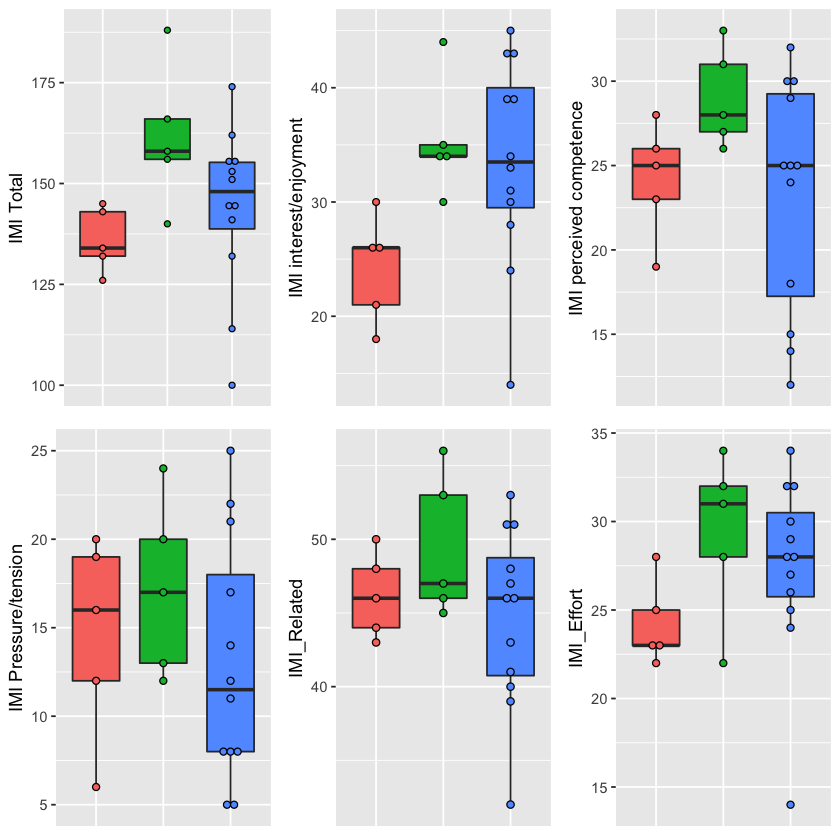

In [37]:
ImiTotalBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMITotal,
                                    fill=Avoidance_clusters))
ImiTotalPlot <- ImiTotalBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI Total") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())


ImiInterestBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMIInterest,
                                    fill=Avoidance_clusters))
ImiInterestPlot <- ImiInterestBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.6, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI interest/enjoyment") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



ImiCompetenceBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMICompetence,
                                    fill=Avoidance_clusters))
ImiCompetencePlot <- ImiCompetenceBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI perceived competence") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ImiPressureBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMIPressure,
                                    fill=Avoidance_clusters))
ImiPressurePlot <- ImiPressureBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI Pressure/tension") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())



ImiRelatedBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMIRelated,
                                    fill=Avoidance_clusters))
ImiRelatedPlot <- ImiRelatedBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI_Related") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ImiEffortBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, IMIEffort,
                                    fill=Avoidance_clusters))
ImiEffortPlot <- ImiEffortBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="IMI_Effort") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




grid.arrange(ImiTotalPlot, ImiInterestPlot, ImiCompetencePlot, ImiPressurePlot,
             ImiRelatedPlot, ImiEffortPlot, ncol = 3, nrow = 2)

## Kruskal-Wallis rank sum tests for motivation (IMI)

In [39]:
print("IMI Total")
kruskal.test(data$IMITotal ~ data$Avoidance_clusters)
dunn.test(data$IMITotal, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("IMI interest/enjoyment")
kruskal.test(data$IMIInterest ~ data$Avoidance_clusters)
dunn.test(data$IMIInterest, data$Avoidance_clusters, method='bh')
print("======================================================================================")
print("IMI perceived competence")
kruskal.test(data$IMICompetence ~ data$Avoidance_clusters)
print("======================================================================================")
print("IMI pressure/tension")
kruskal.test(data$IMIPressure ~ data$Avoidance_clusters)
print("======================================================================================")
print("IMI_Related")
kruskal.test(data$IMIRelated ~ data$Avoidance_clusters)
print("======================================================================================")
print("IMI_Effort")
kruskal.test(data$IMIEffort ~ data$Avoidance_clusters)
print("======================================================================================")

[1] "IMI Total"



	Kruskal-Wallis rank sum test

data:  data$IMITotal by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 5.8479, df = 2, p-value = 0.05372


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 5.8479, df = 2, p-value = 0.05


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.412618
         |    0.0238*
         |
stable h |  -1.300595   1.566022
         |     0.0967     0.0880

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "IMI interest/enjoyment"



	Kruskal-Wallis rank sum test

data:  data$IMIInterest by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 6.8497, df = 2, p-value = 0.03255


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 6.8497, df = 2, p-value = 0.03


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -2.393670
         |    0.0250*
         |
stable h |  -2.273348   0.570755
         |    0.0173*     0.2841

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "======================================================================================"
[1] "IMI perceived competence"



	Kruskal-Wallis rank sum test

data:  data$IMICompetence by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.3522, df = 2, p-value = 0.1135


[1] "======================================================================================"
[1] "IMI pressure/tension"



	Kruskal-Wallis rank sum test

data:  data$IMIPressure by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.6928, df = 2, p-value = 0.429


[1] "======================================================================================"
[1] "IMI_Related"



	Kruskal-Wallis rank sum test

data:  data$IMIRelated by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.8501, df = 2, p-value = 0.3965


[1] "======================================================================================"
[1] "IMI_Effort"



	Kruskal-Wallis rank sum test

data:  data$IMIEffort by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.559, df = 2, p-value = 0.1023


[1] "======================================================================================"


'BIS' 'AI' 'AllAR' 'STAIS_Group' 'BIS_Group' 'ID2' 'STAIT_Groups'

'BISMedian_Group'   'ShockVolts' 'MeanBP_Avoid' 'Mean_BP_Motor' 'RT_ALL_Avoid' 'RT_ALL_Motor' 'RT_Early_Avoid' 'RT_Late_Avoid' 'RT_Early_Motor' 'RT_Late_Motor' 'Age' 'Ancestry' 'Sex' 'Marital_Status' 'Student' 'Education' 'Yrs_ed' 'WorkingNow'


'Change_group' 'SumChangePerf'  'PERF_LEARN_GROUP' 'AVG_1ST6' 'AVG_LAST6' 'DIFF'  'Chg2Grp'  



**COPE inventory:

- In the database, but not in the paper:'Active_Sub' 'Passive_Sub' humor, religious PosTot NegTot


**Barrat’s Impulsivity Scale

- In the database, but not in the paper: 'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp


**Intrinsic Motivation Inventory 

- In the database, but not in the paper: 'IMIRelated' 'IMIEffort'
- In the paper, but not in the database: perceived choice